## Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [2]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Read the CSV file from the drive
campdata = pd.read_excel('/content/drive/MyDrive/Data Folder/adcampaign.xlsx', parse_dates=[0])

# Print the first few rows of the DataFrame
campdata.head()

Mounted at /content/drive


,Date,CreativeID,CreativeName,MediaFormat,CreativeCategory,DominantColour,CreativeFormat,Impressions,Clicks,VideoStarts,VideoCompletions,OperatingSystem,DayofWeek,Site,SiteCategory
0,2018-04-26,692,Artful Dodger,Vertical Video,Art,Video,Mobile Interscroller,50,0,10,4,Android,4,Progressive News,News
1,2018-04-26,692,Artful Dodger,Vertical Video,Art,Video,Mobile Interscroller,9,0,3,2,Android,4,The City Daily,News
2,2018-04-26,692,Artful Dodger,Vertical Video,Art,Video,Mobile Interscroller,124,0,56,26,iOS,4,Progressive News,News
3,2018-04-26,692,Artful Dodger,Vertical Video,Art,Video,Mobile Interscroller,58,0,34,15,iOS,4,The City Daily,News
4,2018-04-26,692,Artful Dodger,Vertical Video,Art,Video,Mobile Interscroller,2,0,0,0,Other,4,Progressive News,News


In [3]:
campdata.tail()

,Date,CreativeID,CreativeName,MediaFormat,CreativeCategory,DominantColour,CreativeFormat,Impressions,Clicks,VideoStarts,VideoCompletions,OperatingSystem,DayofWeek,Site,SiteCategory
37443,2018-06-06,1110,DoYouEvenLift?,Static Display,Sports,Light Blue,MPU,38,0,0,0,Android,3,Wot? Lifestyle,Lifestyle
37444,2018-06-06,1110,DoYouEvenLift?,Static Display,Sports,Light Blue,MPU,2,0,0,0,Other,3,Wot? Lifestyle,Lifestyle
37445,2018-06-06,1110,DoYouEvenLift?,Static Display,Sports,Light Blue,MPU,4,0,0,0,iOS,3,Wot? Lifestyle,Lifestyle
37446,2018-06-06,1110,DoYouEvenLift?,Static Display,Sports,Light Blue,MPU,146,0,0,0,iOS,3,Wot? Lifestyle,Lifestyle
37447,2018-06-06,1110,DoYouEvenLift?,Static Display,Sports,Light Blue,MPU,1,0,0,0,Other,3,Wot? Lifestyle,Lifestyle


In [4]:
# Shape of the data
campdata.shape

(37448, 15)

In [5]:
campdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37448 entries, 0 to 37447
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              37448 non-null  datetime64[ns]
 1   CreativeID        37448 non-null  int64         
 2   CreativeName      37448 non-null  object        
 3   MediaFormat       37448 non-null  object        
 4   CreativeCategory  37448 non-null  object        
 5   DominantColour    37448 non-null  object        
 6   CreativeFormat    37448 non-null  object        
 7   Impressions       37448 non-null  int64         
 8   Clicks            37448 non-null  int64         
 9   VideoStarts       37448 non-null  int64         
 10  VideoCompletions  37448 non-null  int64         
 11  OperatingSystem   37448 non-null  object        
 12  DayofWeek         37448 non-null  int64         
 13  Site              37448 non-null  object        
 14  SiteCategory      3744

In [6]:
campdata.columns #Returns all the column names

Index(['Date', 'CreativeID', 'CreativeName', 'MediaFormat', 'CreativeCategory',
       'DominantColour', 'CreativeFormat', 'Impressions', 'Clicks',
       'VideoStarts', 'VideoCompletions', 'OperatingSystem', 'DayofWeek',
       'Site', 'SiteCategory'],
      dtype='object')

## Data Pre-processing : Finding out NaN values. 

In [7]:
campdata.isna().any()

Date                False
CreativeID          False
CreativeName        False
MediaFormat         False
CreativeCategory    False
DominantColour      False
CreativeFormat      False
Impressions         False
Clicks              False
VideoStarts         False
VideoCompletions    False
OperatingSystem     False
DayofWeek           False
Site                False
SiteCategory        False
dtype: bool

## Cleaning the data

In [8]:
campdata['Site'].unique()
# Taking this step as I have observed a site with the name "Wot? Lifestyle", I assume that it should be Lifestyle. 

array(['Progressive News', 'The City Daily', 'Business Times',
       'Sitting Pretty', 'The ClothesRack', 'NIMBY Times', 'Spambook',
       'FootyNews', 'Wot? Lifestyle', 'More Sport', 'CityNews',
       'Weights & Plates', 'Marathon Digest', 'The Classic Gentleman',
       'MusicRoom', 'RockTunes', 'GossipNews', 'SportSpam', 'FPSGaming',
       'Cycling Today', 'PedalBikez', 'Vroom Motoring', 'We Love Gaming',
       'Gadgetron', 'Edgy Lifestyles', 'Coin-Op Gaming', 'UK Broadsheet',
       'Little Bird Lifestyle', 'Home & House', 'Fashionista',
       'The TV News', 'The Ocho Sports Network'], dtype=object)

## Statistical Description of the dataset

In [9]:
campdata.describe()
# Here we can ignore creative id data as it is a numeric categorical value. 

,CreativeID,Impressions,Clicks,VideoStarts,VideoCompletions,DayofWeek
count,37448.000000,37448.000000,37448.000000,37448.000000,37448.000000,37448.000000
mean,2398.816946,262.545076,1.295690,17.248959,7.039335,3.878792
std,1387.873849,783.168308,4.707484,116.342093,48.925129,1.998323
min,84.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1157.000000,3.000000,0.000000,0.000000,0.000000,2.000000
50%,2309.000000,23.000000,0.000000,0.000000,0.000000,4.000000
75%,3556.000000,180.000000,1.000000,0.000000,0.000000,6.000000
max,4980.000000,28873.000000,175.000000,3849.000000,1680.000000,7.000000


## Unique Value check

In [10]:
campdata.nunique()
# This function show how many unique values we have across the columns.
# For exp : In date column we have 42 so can consider we have 42 days of data and so on.

Date                  42
CreativeID            70
CreativeName          40
MediaFormat            2
CreativeCategory       9
DominantColour         6
CreativeFormat         2
Impressions         2603
Clicks                79
VideoStarts          738
VideoCompletions     433
OperatingSystem        3
DayofWeek              7
Site                  32
SiteCategory           6
dtype: int64

### Observations :
1. We have 42 days of campaign data available.
2. We have 70 different types of Creatives ID's
3. We have 40 creatives under 9 creative categories.
4. We have 6 colour categories.
5. We have 2 types in Media format as well as Creative format & 3 types in Operating system.
6. The frequency of impressions recieved so far in the time period of 42 days is 2603.
7. The frequency of clicks recieved so far in the time period of 42 days is 79.
8. We can observe that the frequency of video starts are 738 while the video completions are 433.
9. We have 32 sites under 6 site categories.

## What are the over all highest performing combination of segments ?

In [11]:
campdata.iloc[campdata['Impressions'].idxmax()]

Date                 2018-05-21 00:00:00
CreativeID                          4197
CreativeName               Breaking News
MediaFormat               Static Display
CreativeCategory                    News
DominantColour                      Pink
CreativeFormat      Mobile Interscroller
Impressions                        28873
Clicks                               167
VideoStarts                            0
VideoCompletions                       0
OperatingSystem                  Android
DayofWeek                              1
Site                      Business Times
SiteCategory                        News
Name: 23247, dtype: object

### Observations : 
1. On May 21 2018 Monday, we had the top performing ad with overall Impressions observed to be '28,873' with '167' clicks registered.
2. The site which hosted this ad is 'Business Times' under the Site category as 'News'.
3. Andoid is the operating system where this ad was excecuted with creative format as 'Mobile Interscroller' & media format as 'Static Display'.
4. The id for this particular creative is '4197' with the creative name 'Breaking News' and the creative category as 'News'. 
5. There are '0' video starts and video ends for this ad as this a 'Static Display' ad.
6. The Dominant colur of this ad happens to be 'Pink'.

## What are the over all least performing combination of segments ?

In [12]:
campdata.iloc[campdata['Impressions'].idxmin()]

Date                 2018-04-26 00:00:00
CreativeID                           692
CreativeName               Artful Dodger
MediaFormat               Vertical Video
CreativeCategory                     Art
DominantColour                     Video
CreativeFormat      Mobile Interscroller
Impressions                            1
Clicks                                 0
VideoStarts                            0
VideoCompletions                       0
OperatingSystem                  Android
DayofWeek                              4
Site                      Sitting Pretty
SiteCategory                   Lifestyle
Name: 9, dtype: object

### Observations : 
1. On Apr 26 2018 Thrusday, we had the least performing ad with overall Impressions observed to be '1' with '0' clicks & '0' video start and video completions registered.
2. The site which hosted this ad was 'Sitting Pretty' under the Site category as 'Lifestyle'.
3. Andoid is the operating system where this ad was excecuted with creative format as 'Mobile Interscroller' & media format as 'Vertical Video'.
4. The id for this particular creative is '692' with the creative name 'Artful Dodger' and the creative category as 'Art'.

## The best and worst ads to grab more Video starts? 

In [13]:
campdata.iloc[campdata['VideoStarts'].idxmax()]

Date                 2018-05-16 00:00:00
CreativeID                          3400
CreativeName                   YogaBunny
MediaFormat               Vertical Video
CreativeCategory                  Sports
DominantColour                     Video
CreativeFormat      Mobile Interscroller
Impressions                         8284
Clicks                                59
VideoStarts                         3849
VideoCompletions                    1599
OperatingSystem                      iOS
DayofWeek                              3
Site                            CityNews
SiteCategory                        News
Name: 18930, dtype: object

### Observations : 
1. On May 16 2018 wednesday, the ad with creative name 'YogaBunny' in Sports creative category with Mobile Interscroller grabbed highest video starts. 
2. Impressions registered for this ad 8 '8284' with '59' clicks and '3849' Video starts and '1599' video completions. 
3. iOS is the Operating system where the impressions were registered for this particular ad with the site as CityNews and the site category as News. 

In [14]:
campdata.iloc[campdata['VideoStarts'].idxmin()]

Date                 2018-04-26 00:00:00
CreativeID                           692
CreativeName               Artful Dodger
MediaFormat               Vertical Video
CreativeCategory                     Art
DominantColour                     Video
CreativeFormat      Mobile Interscroller
Impressions                            2
Clicks                                 0
VideoStarts                            0
VideoCompletions                       0
OperatingSystem                    Other
DayofWeek                              4
Site                    Progressive News
SiteCategory                        News
Name: 4, dtype: object

### Observations
1. On April 26 2018 Thrusday, the ad with creative name 'Artful Dodger' in Art creative category with Mobile Interscroller grabbed least video starts. 
2. Impressions registered for this ad are '2' with '0' clicks and '0' Video starts and '0' video completions. 
3. 'Other' is the Operating system where the impressions were registered for this particular ad with the site as progressiveNews and the site category as News.

## The best and worst ads to grab more Video completions? 

In [15]:
campdata.iloc[campdata['VideoCompletions'].idxmax()]

Date                 2018-05-16 00:00:00
CreativeID                          1125
CreativeName                  Face Fails
MediaFormat               Vertical Video
CreativeCategory                  Sports
DominantColour                     Video
CreativeFormat      Mobile Interscroller
Impressions                         8132
Clicks                                48
VideoStarts                         3811
VideoCompletions                    1680
OperatingSystem                      iOS
DayofWeek                              3
Site                            CityNews
SiteCategory                        News
Name: 18367, dtype: object

### Observations :
1. On May 16 2018 wednesday, the ad with creative name 'Face Fails' in 'Sports' creative category with Mobile Interscroller grabbed most video completions. 
2. Impressions registered for this ad are '8132' with '48' clicks and '3811' Video starts and '1680' video completions. 
3. 'iOS' is the Operating system where the impressions were registered for this particular ad with the site as CityNews and the site category as News.

In [16]:
campdata.iloc[campdata['VideoCompletions'].idxmin()]

Date                 2018-04-26 00:00:00
CreativeID                           692
CreativeName               Artful Dodger
MediaFormat               Vertical Video
CreativeCategory                     Art
DominantColour                     Video
CreativeFormat      Mobile Interscroller
Impressions                            2
Clicks                                 0
VideoStarts                            0
VideoCompletions                       0
OperatingSystem                    Other
DayofWeek                              4
Site                    Progressive News
SiteCategory                        News
Name: 4, dtype: object

### Observations :
1. On April 26 2018 Thursday, the ad with creative name 'Artful Dodger' in 'Art' creative category with Mobile Interscroller grabbed least video completions. 
2. Impressions registered for this ad are '2' with '0' clicks and '0' Video starts and '0' video completions. 
3. 'Other' is the Operating system where the impressions were registered for this particular ad with the site as Progressivenews and the site category as News.

## Which Site categories has the highest Interaction?

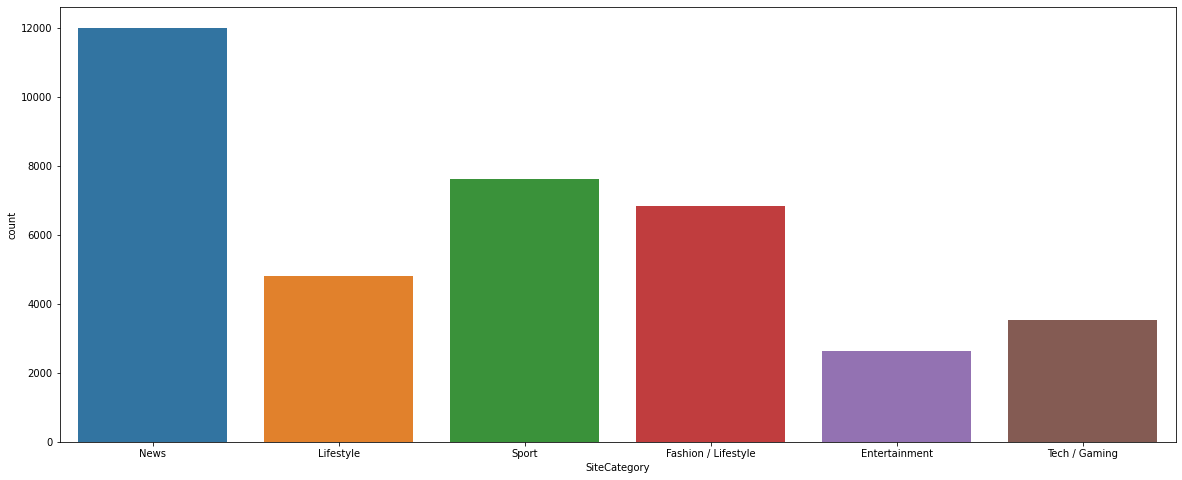

In [17]:
fig_dims = (20,8) # For size of the figure
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='SiteCategory', ax=ax, data=campdata,)
plt.show()

## Observations :
1. News is the site category which has the highest interacted site category recorded. 
2. Entertainment category remains the least interacted site category. 
3. Sports and Fashion/Lifestyle remains 2nd and 3rd positions respectively. 

## Which Operating System has the highest Interaction?

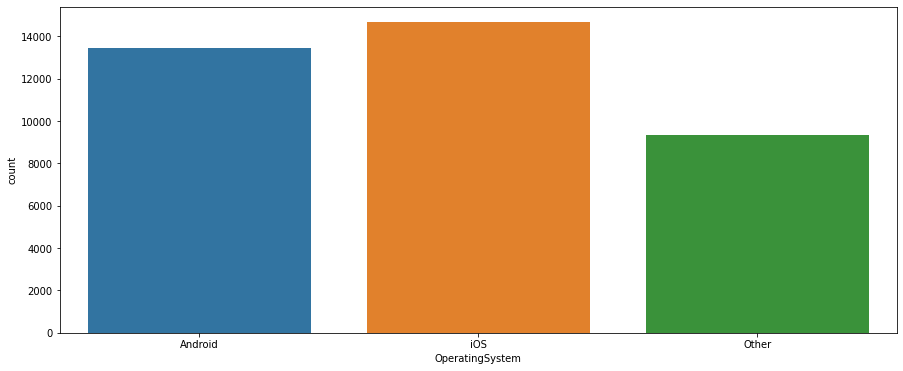

In [18]:
fig_dims = (15,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='OperatingSystem', ax=ax, data=campdata)
plt.show()

### Observations :
iOS has more interaction compared to Android os

## What are the best and worst performing sites?

<Axes: xlabel='Site'>

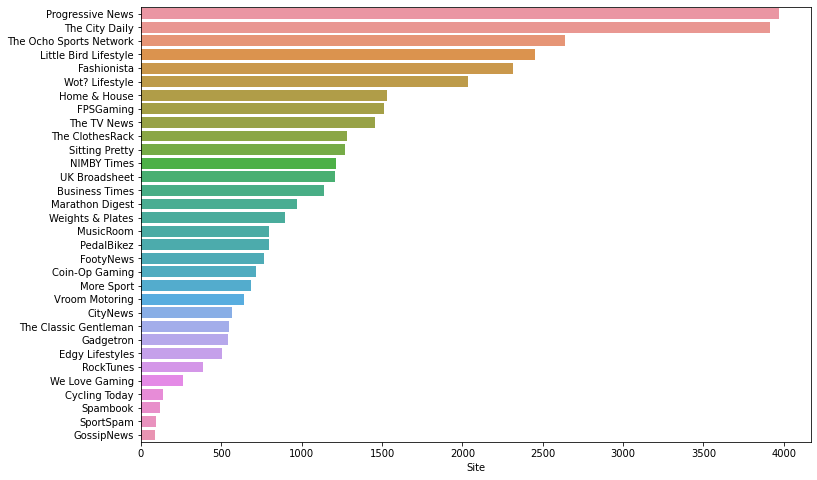

In [19]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
campdata1 = campdata.Site.value_counts() #Created new data variable campdata1
sns.barplot(y = campdata1.index, x=campdata1)

### Observations : 
1. The top 2 performing sites are 'Progressive News' & 'The City Daily'.
2. The last 2 performing sites are 'SportsSpam' & 'GossipNews'.

## No of Impressions count observed over the sites?

In [20]:
campdata['Site'].value_counts()

Progressive News           3968
The City Daily             3913
The Ocho Sports Network    2638
Little Bird Lifestyle      2451
Fashionista                2313
Wot? Lifestyle             2035
Home & House               1532
FPSGaming                  1511
The TV News                1457
The ClothesRack            1282
Sitting Pretty             1267
NIMBY Times                1211
UK Broadsheet              1208
Business Times             1137
Marathon Digest             970
Weights & Plates            897
MusicRoom                   799
PedalBikez                  797
FootyNews                   766
Coin-Op Gaming              716
More Sport                  686
Vroom Motoring              642
CityNews                    568
The Classic Gentleman       547
Gadgetron                   543
Edgy Lifestyles             506
RockTunes                   386
We Love Gaming              260
Cycling Today               138
Spambook                    120
SportSpam                    96
GossipNe

## What are the best and worst performing Creative categories?

In [21]:
campdata.columns

Index(['Date', 'CreativeID', 'CreativeName', 'MediaFormat', 'CreativeCategory',
       'DominantColour', 'CreativeFormat', 'Impressions', 'Clicks',
       'VideoStarts', 'VideoCompletions', 'OperatingSystem', 'DayofWeek',
       'Site', 'SiteCategory'],
      dtype='object')

<Axes: xlabel='CreativeCategory'>

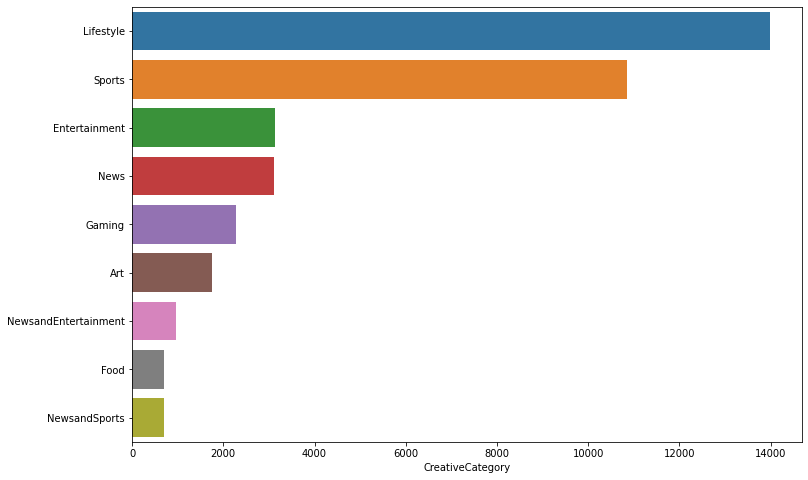

In [22]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 8)
campdata1 = campdata.CreativeCategory.value_counts()
sns.barplot(y = campdata1.index, x=campdata1, )

### Observations : 
Lifestyle stands to be highest performer where NewsandSports stands at the last position.

## In which creative category the highest number of ads were displayed.

In [23]:
campdata['CreativeCategory'].value_counts()

Lifestyle               13980
Sports                  10851
Entertainment            3125
News                     3112
Gaming                   2285
Art                      1749
NewsandEntertainment      962
Food                      693
NewsandSports             691
Name: CreativeCategory, dtype: int64

## Top performing Dominant colours per Creative Format

In [24]:
campdata.groupby('CreativeFormat')['DominantColour'].value_counts()

CreativeFormat        DominantColour
MPU                   Purple            2324
                      Yellow            2167
                      Light Blue        2072
                      Pink              1769
                      Light Green       1583
Mobile Interscroller  Video             8570
                      Purple            4158
                      Yellow            3993
                      Pink              3943
                      Light Blue        3878
                      Light Green       2991
Name: DominantColour, dtype: int64

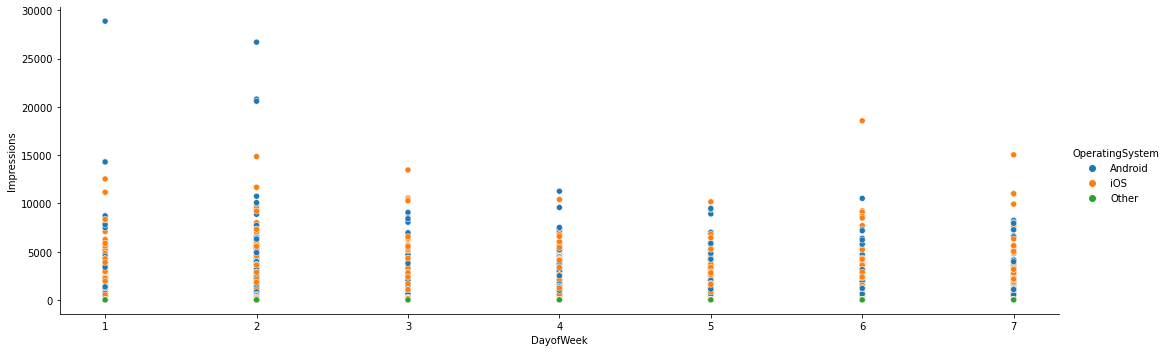

In [25]:
# Relplot to undestand the relation the impressions share with days of week over Operating system.
sns.relplot(x="DayofWeek",y="Impressions",hue="OperatingSystem",data=campdata,height=5,aspect=3)

### Observations : 
1. All the days over three months gathered identical roundoff of the impressions irrespective of OS. 
2. We can observe more number of iOS users on Day1, Day2, & Day 3. 
3. Overall iOS is dominant interms of Impressions across day of week.